# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
# ... WRITE YOUR CODE HERE...

import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import epidemics_helper

nyc_augmented_network_json = open("nyc_augmented_network.json", "r")
data = json.load(nyc_augmented_network_json)

data_nodes = []
data_edges = []

for dic in data['nodes']:
    data_nodes.append(dic['id']) # make nodes list
for dic in data['links']:
    data_edges.append((dic['source'], dic['target'])) # make edges list
    
G = nx.Graph()
G.add_nodes_from(data_nodes)
G.add_edges_from(data_edges)

### 1. The first infection was observed at node 23654. Simulate the Plague epidemic with the aforementioned parameters for 100 days.

In [2]:
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100.0)

Epidemic stopped after 99.26 days | 99.26 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


### 2. Plot the evolution of the epidemic over time. In particular, plot the percentage of susceptible, infected and recovered nodes over time.

In [3]:
# make a ４ rows 100 columns matrix.  
# Rows correspond to numbers of day, S nodes, I nodes and R nodes.
numbers_SIR = np.zeros((4, 100), dtype = 'int') 
numbers_SIR[0] = np.arange(100) 

for day in numbers_SIR[0]:
    for node in data_nodes:
        if sir.inf_time[node] > day:
            numbers_SIR[1, day] += 1 # add 1 to numbers of S
        elif sir.inf_time[node]  <= day and day < sir.rec_time[node]:
            numbers_SIR[2, day] += 1 # add 1 to numbers of I
        else:
            numbers_SIR[3, day] += 1 # add 1 to numbers of R

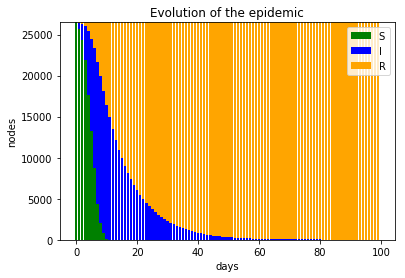

In [4]:
plt.bar(numbers_SIR[0], numbers_SIR[1], color = 'green', label = "S")
plt.bar(numbers_SIR[0], numbers_SIR[2], bottom = numbers_SIR[1], color = 'blue', label = "I")
plt.bar(numbers_SIR[0], numbers_SIR[3], bottom = numbers_SIR[1] + numbers_SIR[2], color = 'orange', label = "R")
plt.title("Evolution of the epidemic")
plt.xlabel("days")
plt.ylabel("nodes")
plt.legend()

### 3. How long does it take before 60% of the population is infected? dead?

In [5]:
for day in numbers_SIR[0]:
    if (numbers_SIR[2][day] + numbers_SIR[3][day]) / len(data_nodes) >= 0.6:
        print("It takes {} days　before 60% of the population is infeceted or died.".format(day))
        break
    else:
        continue

It takes 6 days　before 60% of the population is infeceted or died.


### 4. Use the coordinates of the nodes to visualize the graph. Show susceptible, infected and recovered nodes in different colors to differentiate them. How does the graph look like after 1 day? 3 days? 30 days?

In [6]:
def draw(day):
    color_map = []
    for node in data_nodes:
        if sir.inf_time[node] > day:
            color_map.append('blue') # S nodes are blue
        elif sir.inf_time[node]  <= day and day < sir.rec_time[node]:
            color_map.append('red') # I nodes are red
        else:
            color_map.append('green') # R nodes are green
    plt.figure(figsize=(12, 12))
    nx.draw(G, node_color = color_map, with_labels = False, node_size = 1, line_color = 'grey', width=0.5) 
    plt.axis('off')

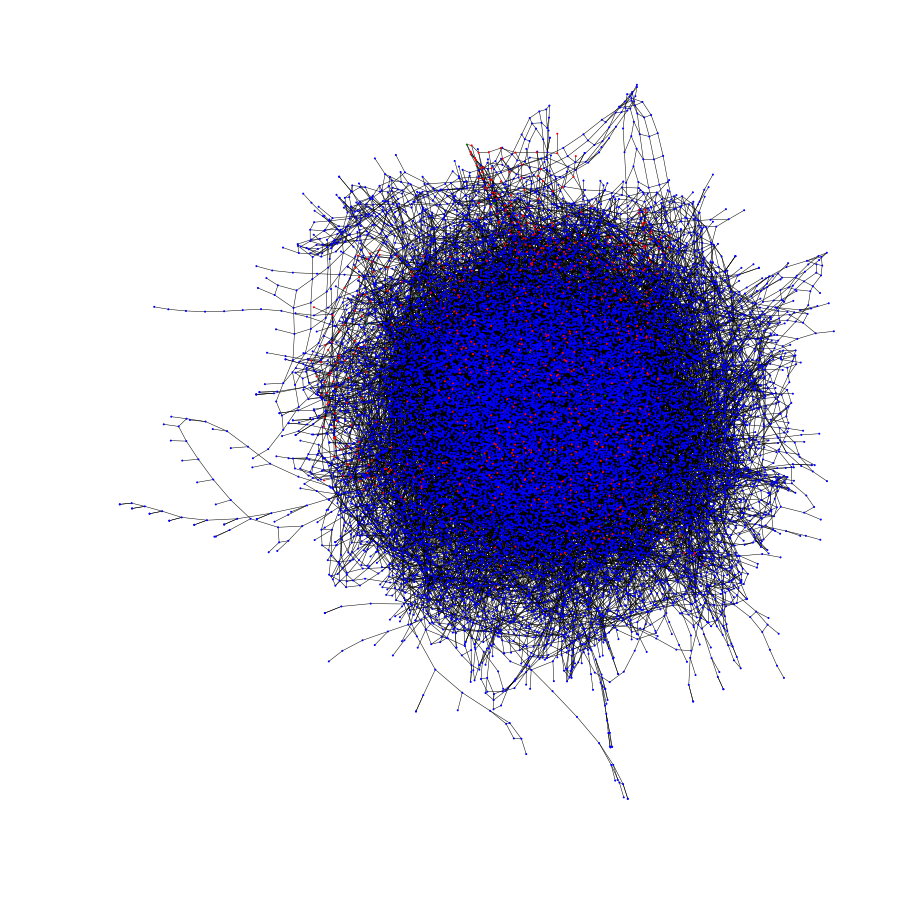

In [6]:
draw(1)

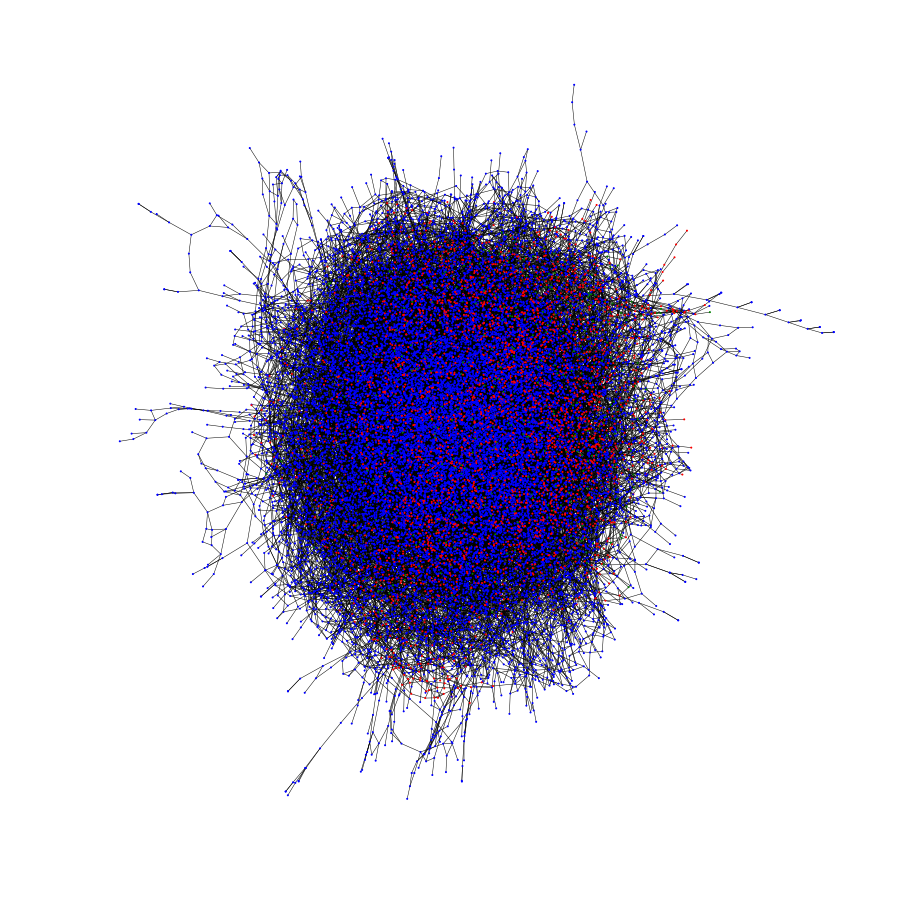

In [7]:
draw(3)

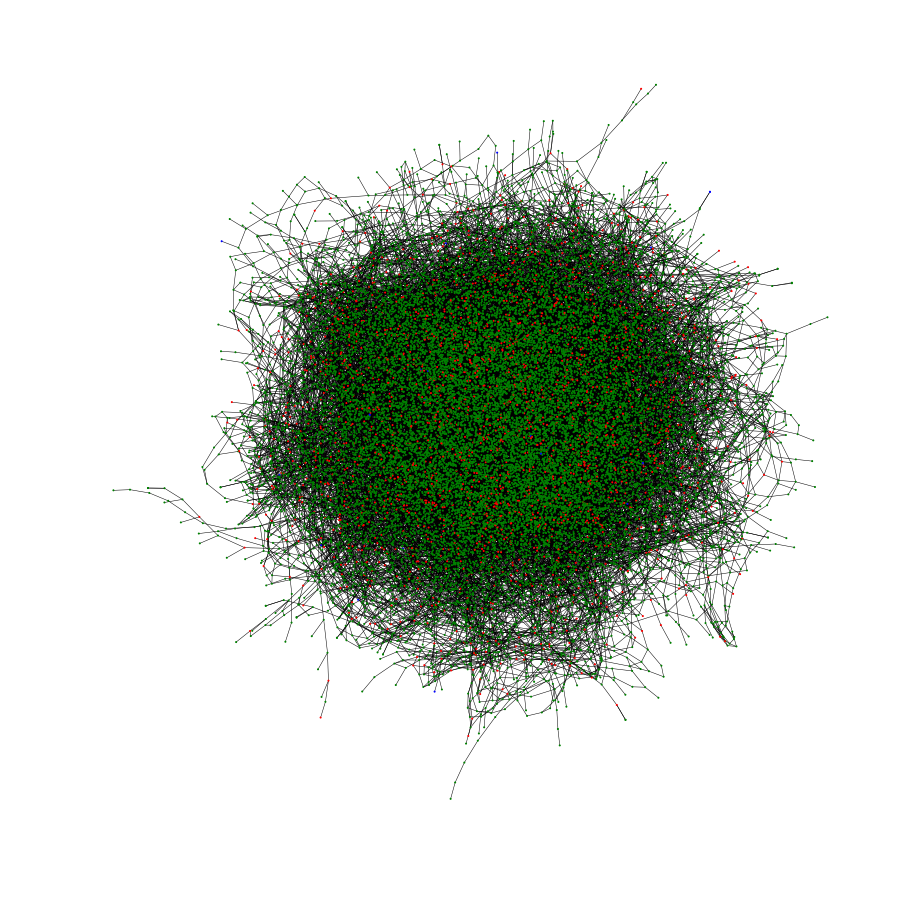

In [7]:
draw(30)

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

### • Implement this strategy with a budget of 1000 edges to remove.
### • Simulate the epidemic multiple times with the same parameters, i.e. β = 10.0 andγ = 0.1, starting from randomly selected source nodes.

In [ ]:
import random

data_edges2 = random.sample(data_edges, len(data_edges)-1000)

G2 = nx.Graph()
G2.add_nodes_from(data_nodes)
G2.add_edges_from(data_edges2)

sir = epidemics_helper.SimulationSIR(G2, beta=10.0, gamma=0.1)
sir.launch_epidemic(source = random.sample(data_nodes, 1)[0], max_time=100.0)

### • Is this strategy effective? >> Not so much.

### • On average, how many people are healthy, infected, dead after 30 days?

In [19]:
S, I, R = [], [], []
repeat_time = 10

for i in range(repeat_time):
    sir.launch_epidemic(source = random.sample(data_nodes, 1)[0], max_time=100.0)
    s, i, r = 0, 0, 0
    for node in data_nodes:
        if sir.inf_time[node] > 30:
            s += 1
        elif sir.inf_time[node]  <= 30 and 30 < sir.rec_time[node]:
            i += 1
        else:
            r += 1
    S.append(s)
    I.append(i)
    R.append(r)

print("average of healthy, infected, dead after 30 days= {}".format([sum(S) / len(S), sum(I) / len(I), sum(R) / len(I)]))

Epidemic stopped after 103.28 days | 103.28 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 101.62 days | 101.62 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 100.55 days | 100.55 days elapsed | 0.2% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 102.21 days | 102.21 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 111.61 days | 111.61 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 100.40 days | 100.40 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 108.00 days | 108.00 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 103.22 days | 103.22 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 103.38 days | 103.38 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 102.6

#### Exercise 2.11: Strategy 2

In [20]:
a = 0
for bridge in list(nx.bridges(G)):
    G.remove_edge(bridge[0], bridge[1])
    a += 1
    
print(a)

1850


In [21]:
S, I, R = [], [], []
repeat_time = 10
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)

for i in range(repeat_time):
    sir.launch_epidemic(source = random.sample(data_nodes, 1)[0], max_time=100.0)
    s, i, r = 0, 0, 0
    for node in data_nodes:
        if sir.inf_time[node] > 30:
            s += 1
        elif sir.inf_time[node]  <= 30 and 30 < sir.rec_time[node]:
            i += 1
        else:
            r += 1
    S.append(s)
    I.append(i)
    R.append(r)

print("average of healthy, infected, dead after 30 days= {}".format([sum(S) / len(S), sum(I) / len(I), sum(R) / len(I)]))

Epidemic stopped after 108.50 days | 108.50 days elapsed | 7.3% susceptible, 0.0% infected, 92.7% recovered
Epidemic stopped after 106.29 days | 106.29 days elapsed | 7.3% susceptible, 0.0% infected, 92.7% recovered
Epidemic stopped after 100.83 days | 100.83 days elapsed | 7.3% susceptible, 0.0% infected, 92.7% recovered
Epidemic stopped after 112.15 days | 112.15 days elapsed | 7.3% susceptible, 0.0% infected, 92.7% recovered
Epidemic stopped after 111.77 days | 111.77 days elapsed | 7.3% susceptible, 0.0% infected, 92.7% recovered
Epidemic stopped after 102.08 days | 102.08 days elapsed | 7.3% susceptible, 0.0% infected, 92.7% recovered
Epidemic stopped after 6.52 days | 6.52 days elapsed | 100.0% susceptible, 0.0% infected, 0.0% recovered
Epidemic stopped after 104.60 days | 104.60 days elapsed | 7.3% susceptible, 0.0% infected, 92.7% recovered
Epidemic stopped after 109.78 days | 109.78 days elapsed | 7.3% susceptible, 0.0% infected, 92.7% recovered
Epidemic stopped after 151.20 d

In [22]:
a = 0
for bridge in list(nx.local_bridges(G, with_span=False, weight=None)):
    G.remove_edge(bridge[0], bridge[1])
    a += 1
    
print(a)

38160


In [ ]:
#strategy1: rank by shortest_path >> takes time too much
edge_rank = dict.fromkeys(data_edges, 0)

for node1 in range(40):
    for node2 in range(40):
        if nx.has_path(G, node1, node2):
            for i in range(0, len(nx.shortest_path(G, node1, node2))-1):
                if nx.shortest_path(G, node1, node2)[i] <= nx.shortest_path(G, node1, node2)[i+1]:
                    edge_rank[(nx.shortest_path(G, node1, node2)[i], nx.shortest_path(G, node1, node2)[i+1])] +=1
                else:
                    edge_rank[(nx.shortest_path(G, node1, node2)[i+1], nx.shortest_path(G, node1, node2)[i])] +=1

edge_rank

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

largest_degree = max(degree_sequence)
largest_degree



In [8]:
G.degree(1)

2